In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
env = gym.make("Taxi-v3").env

In [3]:
# Q Table
# 500 states and 6 actions
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [5]:
# Hyper parameter
alpha = 0.1
gamma = 0.9
epsilon = 0.1

In [6]:
# Plotting Matrix
reward_list = []
dropouts_list = []

In [7]:
# Episode
episode_number = 10000
for i in range(1, episode_number):
    
    # initialize environment
    state = env.reset()
    
    reward_count = 0
    dropouts = 0
    
    while True:
        # exploit vs explore to find action
        # %10 = explore, %90 exploit
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # action process and take reward/observation
        next_state, reward, done, _ = env.step(action)
        
        # Q learning function
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        next_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        
        # update Q Table
        q_table[state, action] = next_value
        
        # update state
        state = next_state
        
        # find wrong dropouts
        if reward == -10:
            dropouts += 1
        
        if done:
            break
            
        reward_count += reward
    
    if i%10 == 0:
        dropouts_list.append(dropouts)
        reward_list.append(reward_count)
        # print("Episode: {}, reward: {}, wrong dropout: {}".format(i, reward_count, dropouts))

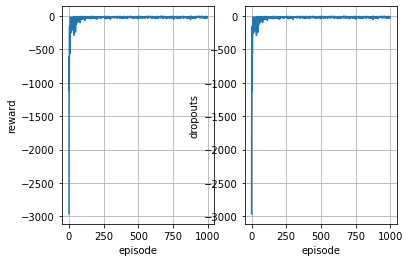

In [8]:
# visualize
fig, axs = plt.subplots(1, 2)
axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")

axs[1].plot(reward_list)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("dropouts")

axs[0].grid(True)
axs[1].grid(True)

plt.show()